In [1]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

c:\Users\maitp\anaconda3\envs\PYTHON_PROJECT_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda job_skill: ast.literal_eval(job_skill) if pd.notna(job_skill) else job_skill
)

In [7]:
# Explode job_skills
df_explode = df.explode("job_skills")
skills_count = df_explode.groupby(
    ["job_title_short", "job_skills"], as_index=False
).size()
skills_count.reset_index(drop=True, inplace=True)
skills_count.sort_values("size", ascending=False, inplace=True)

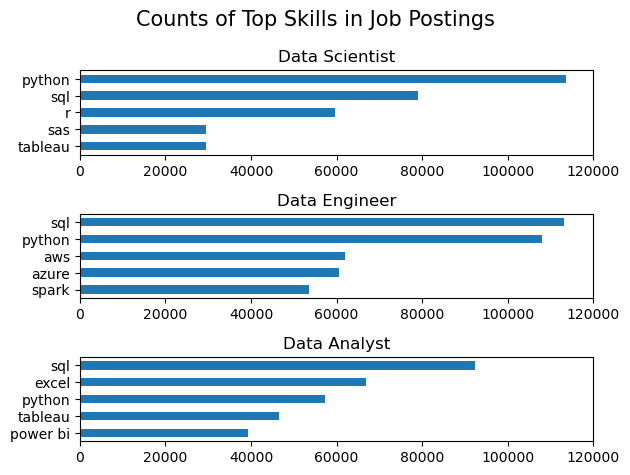

In [8]:
job_titles = ["Data Scientist", "Data Engineer", "Data Analyst"]
fig, ax = plt.subplots(3, 1)
for i, job_title in enumerate(job_titles):
    df_plot = skills_count.loc[skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(
        kind="barh",
        x="job_skills",
        ax=ax[i],
        title=job_title,
        ylabel="",
        legend=None,
    )
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 120000)
fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout()